In [ ]:
# um alles zu klonen: git add . && git commit -m "update" && git push


In [ ]:
#um die Textdateien von Object 0 auf object 1 ändern:

import os

# Pfad zum Label-Ordner deines Freundes
label_folder = r"C:/Users/dengl/Downloads/glass/obj_train_data"

# Neue Klassen-ID für plastics
new_class_id = 1

for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        path = os.path.join(label_folder, filename)
        with open(path, "r") as f:
            lines = f.readlines()
        new_lines = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) > 0:
                parts[0] = str(new_class_id)
                new_lines.append(" ".join(parts) + "\n")
        with open(path, "w") as f:
            f.writelines(new_lines)

print("Fertig! Alle Klassen-IDs geändert auf", new_class_id)


Fertig! Alle Klassen-IDs geändert auf 1


In [9]:
#---------------------------------------------Pfad umwandler---------------------------------------------------------------

#pip install pyperclip
#pfad wird automatisch in zwischenablage gespeichert


import pyperclip

def convert_path(path):
    return path.replace("\\", "/")

def copy_to_clipboard(path):
    pyperclip.copy(path)
    print("Der umgewandelte Pfad wurde in die Zwischenablage kopiert.")

#-------------------------------pfad:------------------------------------------------
pfad = r'C:\Users\dengl\OneDrive\Dokumente\HTL\5. Klasse\ITP\Projekt\Test-Image\Metal\input'


convertedPath = convert_path(pfad)
copy_to_clipboard(convertedPath)


Der umgewandelte Pfad wurde in die Zwischenablage kopiert.


In [7]:
from ultralytics import YOLO
import os
import cv2

# Lade das trainierte Modell
model = YOLO(
    'C:/Users/dengl/OneDrive/Dokumente/HTL/5. Klasse/ITP/Projekt/Python/Test1-Paper-Plastic/runs/detect/train/weights/best.pt')

# Verzeichnis, das die Bilder enthält
image_folder = "C:/Users/dengl/OneDrive/Dokumente/HTL/5. Klasse/ITP/Projekt/Test-Image/Paper-Plastik"

# Gehe durch alle Dateien im Ordner
for image_name in os.listdir(image_folder):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):  # Filter für Bilddateien
        image_path = os.path.join(image_folder, image_name)
        img = cv2.imread(image_path)

        # YOLO-Modell auf das Bild anwenden
        results = model(img)

        # Greife auf das erste Ergebnis zu (es könnte mehr als ein Bild sein)
        result = results[0]

        # Zeige das Bild mit den erkannten Objekten
        result.show()

        # Speichere das Bild mit den Bounding Boxen
        result.save()  # Ergebnisse werden im Output-Ordner gespeichert

        # Alternative: Ergebnisse in der Konsole anzeigen
        print(
            result.to_df())  # Ändere pandas() zu to_df(), um die Bounding Box-Koordinaten und Klassennamen als DataFrame zu erhalten



0: 384x640 1 paper, 67.7ms
Speed: 3.2ms preprocess, 67.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
shape: (1, 4)
┌───────┬───────┬────────────┬────────────────────────────────┐
│ name  ┆ class ┆ confidence ┆ box                            │
│ ---   ┆ ---   ┆ ---        ┆ ---                            │
│ str   ┆ i64   ┆ f64        ┆ struct[4]                      │
╞═══════╪═══════╪════════════╪════════════════════════════════╡
│ paper ┆ 1     ┆ 0.68178    ┆ {3.56644,0.0,4032.0,2265.2981} │
└───────┴───────┴────────────┴────────────────────────────────┘

0: 448x640 1 paper, 64.9ms
Speed: 1.2ms preprocess, 64.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
shape: (1, 4)
┌───────┬───────┬────────────┬───────────────────────────┐
│ name  ┆ class ┆ confidence ┆ box                       │
│ ---   ┆ ---   ┆ ---        ┆ ---                       │
│ str   ┆ i64   ┆ f64        ┆ struct[4]                 │
╞═══════╪═══════╪════════════╪════════

In [10]:
#testen mit speichern

from ultralytics import YOLO
import os
import cv2

# Lade das trainierte YOLO-Modell
model = YOLO(
    'C:/Users/dengl/OneDrive/Dokumente/HTL/5. Klasse/ITP/Projekt/best.pt'
)

# Eingabeordner mit Testbildern
image_folder = "C:/Users/dengl/OneDrive/Dokumente/HTL/5. Klasse/ITP/Projekt/Test-Image/Paper-Glass/input"

# Ausgabeordner für Ergebnisse
output_folder = "C:/Users/dengl/OneDrive/Dokumente/HTL/5. Klasse/ITP/Projekt/Test-Image/Paper-Glass/output"
os.makedirs(output_folder, exist_ok=True)  # Ordner erstellen, falls nicht vorhanden

# Schleife über alle Bilder im Eingabeordner
for image_name in os.listdir(image_folder):
    if image_name.lower().endswith((".jpg", ".png", ".jpeg")):  # Dateifilter
        image_path = os.path.join(image_folder, image_name)

        # YOLO Prediction auf das Bild anwenden
        results = model.predict(source=image_path, save=True, project=output_folder, name='', exist_ok=True)

        # Optional: Ausgabe in Konsole (Bounding Boxen, Klassen etc.)
        result = results[0]
        print(f"\nErgebnis für {image_name}:")
        print(result.to_df())



image 1/1 C:\Users\dengl\OneDrive\Dokumente\HTL\5. Klasse\ITP\Projekt\Test-Image\Paper-Glass\input\1.png: 640x224 1 glass, 37.6ms
Speed: 1.0ms preprocess, 37.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 224)
Results saved to C:\Users\dengl\OneDrive\Dokumente\HTL\5. Klasse\ITP\Projekt\Test-Image\Paper-Glass\Output\predict

Ergebnis für 1.png:
shape: (1, 4)
┌───────┬───────┬────────────┬─────────────────────────────────┐
│ name  ┆ class ┆ confidence ┆ box                             │
│ ---   ┆ ---   ┆ ---        ┆ ---                             │
│ str   ┆ i64   ┆ f64        ┆ struct[4]                       │
╞═══════╪═══════╪════════════╪═════════════════════════════════╡
│ glass ┆ 1     ┆ 0.91729    ┆ {10.91213,2.68193,312.36798,10… │
└───────┴───────┴────────────┴─────────────────────────────────┘

image 1/1 C:\Users\dengl\OneDrive\Dokumente\HTL\5. Klasse\ITP\Projekt\Test-Image\Paper-Glass\input\11.png: 640x640 1 paper, 75.7ms
Speed: 4.7ms preprocess, 75.7ms inf

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\dengl/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:01<00:00, 12.1MB/s]


Epoch 1/20 | Train Loss: 111.653 | Val Loss: 7.113 | Val Acc: 92.11%
Epoch 2/20 | Train Loss: 28.701 | Val Loss: 4.032 | Val Acc: 94.70%
Epoch 3/20 | Train Loss: 14.178 | Val Loss: 3.120 | Val Acc: 96.54%
Epoch 4/20 | Train Loss: 8.559 | Val Loss: 2.865 | Val Acc: 97.30%
Epoch 5/20 | Train Loss: 5.676 | Val Loss: 2.380 | Val Acc: 97.30%
Epoch 6/20 | Train Loss: 5.710 | Val Loss: 2.507 | Val Acc: 97.51%
Epoch 7/20 | Train Loss: 4.437 | Val Loss: 2.092 | Val Acc: 97.19%
Epoch 8/20 | Train Loss: 2.475 | Val Loss: 2.553 | Val Acc: 97.08%
Epoch 9/20 | Train Loss: 2.864 | Val Loss: 2.615 | Val Acc: 97.62%
Epoch 10/20 | Train Loss: 2.832 | Val Loss: 2.227 | Val Acc: 97.51%
Epoch 11/20 | Train Loss: 3.178 | Val Loss: 3.101 | Val Acc: 96.76%
Epoch 12/20 | Train Loss: 1.781 | Val Loss: 2.858 | Val Acc: 97.41%
Epoch 13/20 | Train Loss: 2.380 | Val Loss: 4.314 | Val Acc: 96.76%
Epoch 14/20 | Train Loss: 3.284 | Val Loss: 1.754 | Val Acc: 98.16%
Epoch 15/20 | Train Loss: 1.863 | Val Loss: 2.603 | V

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

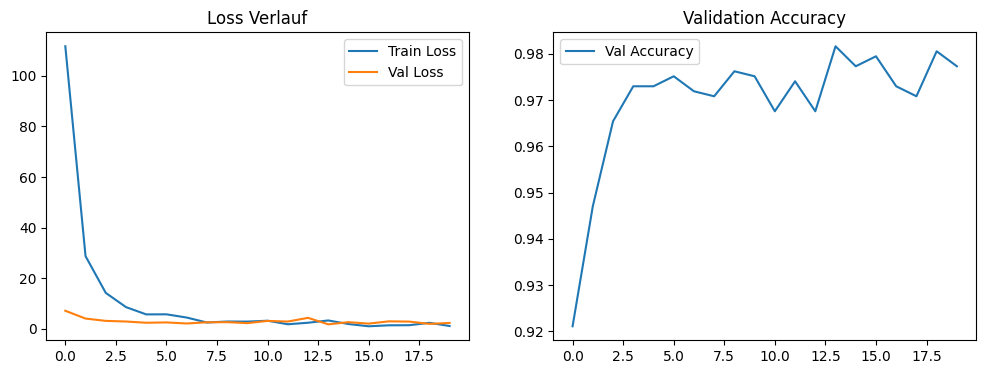

              precision    recall  f1-score   support

        glas       0.97      0.98      0.97       170
      metall       0.97      0.99      0.98       272
      papier       1.00      0.98      0.99       214
     plastik       0.97      0.97      0.97       269

    accuracy                           0.98       925
   macro avg       0.98      0.98      0.98       925
weighted avg       0.98      0.98      0.98       925



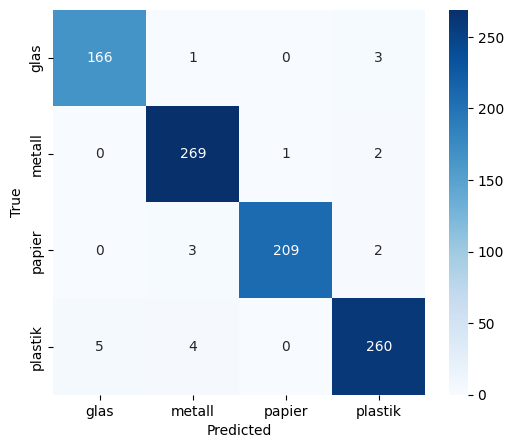

Model exported!


In [7]:
#Pytoch classification
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
#pip install scikit-learn
#pip install seaborn



import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#device (cpu)
device = "cpu"
device

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

#dataset:
#struktur: dataset -> train(images.jpg)val(images.jpg)

train_dir = "E:/dataset/train"
val_dir = "E:/dataset/val"

train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data   = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=2)

class_names = train_data.classes
class_names



counts = torch.bincount(torch.tensor(train_data.targets))
weights = 1.0 / counts.float()
weights = weights / weights.sum()
weights


criterion = nn.CrossEntropyLoss(weight=weights.to(device))

model = models.efficientnet_b0(weights="DEFAULT")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)  # 4 Klassen
model = model.to(device)

#lernrate:-----------------------------------------------------------------------------

optimizer = optim.Adam(model.parameters(), lr=0.0001)

#loop

epochs = 20
train_loss_hist = []
val_loss_hist = []
val_acc_hist = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    train_loss_hist.append(running_loss)
    val_loss_hist.append(val_loss)
    val_acc = correct / total
    val_acc_hist.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {running_loss:.3f} | Val Loss: {val_loss:.3f} | Val Acc: {val_acc*100:.2f}%")



    plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(val_loss_hist, label="Val Loss")
plt.legend()
plt.title("Loss Verlauf")

plt.subplot(1,2,2)
plt.plot(val_acc_hist, label="Val Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.show()


y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images.to(device))
        _, preds = torch.max(outputs, 1)
        
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

torch.save(model.state_dict(), "waste_classifier.pth")

torch.save(model, "waste_classifier_full.pt")

#speichern für android:
example = torch.randn(1, 3, 224, 224).to(device)
scripted_model = torch.jit.trace(model, example)
scripted_model.save("waste_classifier_scripted.pt")

print("Model exported!")


In [13]:
#testen mit ganen ordner
#öffnet die bilder mit beschriftung welche klasse und accuracy


import torch
from torchvision import transforms, models
from PIL import Image, ImageDraw, ImageFont
import os

# Klassen
class_names = ["glas", "metall", "papier", "plastik"]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

model = models.efficientnet_b0(weights=None)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 4)
model.load_state_dict(torch.load("waste_classifier.pth", map_location="cpu"))
model.eval()

#Es sollen alle typsichen Bildformate erlkaubt sein
SUPPORTED = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")

for file in os.listdir(folder):
    if file.lower().endswith(SUPPORTED):
        classify_and_draw(os.path.join(folder, file))
        

def classify_and_draw(path):
    img = Image.open(path).convert("RGB")
    x = transform(img).unsqueeze(0)

    with torch.no_grad():
        out = model(x)
        probs = torch.softmax(out, dim=1)
        conf, pred = torch.max(probs, dim=1)

    label = class_names[pred.item()]
    confidence = conf.item()

    # ins Bild zeichnen
    draw = ImageDraw.Draw(img)
    text = f"{label.upper()} ({confidence*100:.1f}%)"
    draw.rectangle([10, 10, 350, 60], fill=(0,0,0,128))
    draw.text((20, 20), text, fill="white")

    img.show()
    img.save(f"annotated_{os.path.basename(path)}")



#----------------------------------------------Folder-----------------------------------------------

folder = "C:/Users/dengl/OneDrive/Dokumente/HTL/5. Klasse/ITP/Projekt/Test-Image/Metal/input"

for file in os.listdir(folder):
    if file.lower().endswith((".jpg", ".png", ".jpeg")):
        classify_and_draw(os.path.join(folder, file))
